In [5]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 1.0 MB/s eta 0:00:23
   -- ------------------------------------- 1.6/24.0 MB 2.1 MB/s eta 0:00:11
   --- ------------------------------------ 2.4/24.0 MB 2.4 MB/s eta 0:00:09
   ---- ----------------------------------- 2.9/24.0 MB 2.4 MB/s eta 0:00:09
   ----- ---------------------------------- 3.1/24.0 MB 2.3 MB/s eta 0:00:10
   ------ --------------------------------- 3.9/24.0 MB 2.4 MB/s eta 0:00:09
   ------- -------------------------------- 4.7/24.0 MB 2.6 MB/s eta 0:00:08
   --------- ------------------------------ 5.5/24.0 MB 2.7 MB/s eta 0:00:07
   ---------- ----------------------------- 6.3/24.0 MB 2.8 MB/s eta 0:00:07
   ------------ --------------------------- 7.3/24.0 MB 3.0 MB/s eta 0:00:06
   ------------- -------------------------- 8.1/24.0 MB 3.0 MB/s eta 0:00:06
   ----------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Measure similarity between texts. Use vectorization techniques (e.g., TF-IDF, word embeddings). i. Implement
cosine similarity ii. Compare the effectiveness of different similarity measures

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

 TF-IDF consists of two main parts:
 a) Term Frequency (TF):
 TF measures how frequently a word appears in a document. The assumption is that words appearing frequently in a
 document are important.
 B) Inverse Document Frequency (IDF):
 IDF measures the importance of a word across all documents. Common words (e.g., "the", "is", "and") have high TF but are
 not informative, so IDF penalizes them


 

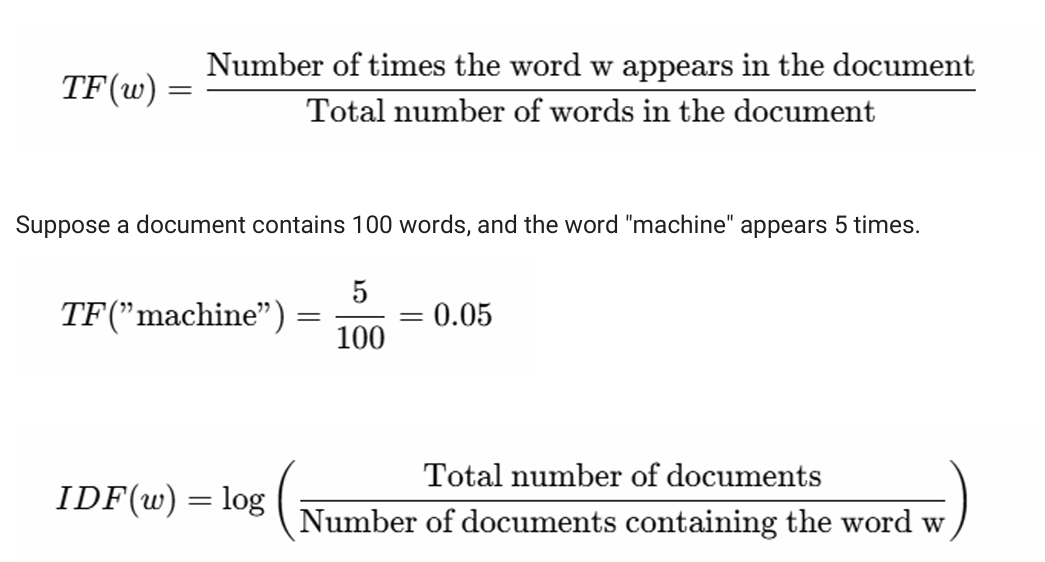

In [ ]:
from IPython.display import display, Image

display(Image(filename="image.png"))


In [9]:
text1 = "keshav memorial institute of technology is located in Narayanguda"
text2 = "I study in Keshav Memorial Institute of Technology."

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])

cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
print(f"Cosine Similarity (TF-IDF): {cosine_sim[0][0]:.4f}")

Cosine Similarity (TF-IDF): 0.6152


WORD2VEC

Word2Vec (Word Embeddings)
Word2Vec represents words as dense vectors using neural networks. It captures semantic meaning based on word co-occurrence.

Two Models:
Continuous Bag of Words (CBOW): Predicts a target word based on surrounding context words.
Skip-Gram Model: Predicts surrounding words given a target word.
Use Case: Used in chatbots, semantic similarity, and word clustering.

In [15]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

text1 = "keshav memorial institute of technology is located in Narayanguda"
text2 = "I study in Keshav Memorial Institute of Technology."

sentences = [word_tokenize(text1.lower()), word_tokenize(text2.lower())]


model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)

print("Word Vector for 'Keshav':")
print(model.wv['keshav'])

print("\nWords similar to 'institute':")
print(model.wv.most_similar("institute", topn=3))

Word Vector for 'Keshav':
[ 2.87271570e-03 -5.29427920e-03 -1.41529432e-02 -1.56103335e-02
 -1.82447881e-02 -1.18685514e-02 -3.69131053e-03 -8.64493381e-03
 -1.29221855e-02 -7.43275369e-03  8.57720152e-03 -7.47633632e-03
  1.67569667e-02  3.06798820e-03 -1.44846840e-02  1.88698247e-02
  1.52598973e-02  1.09839560e-02 -1.36972293e-02  1.16428398e-02
  8.02123360e-03  1.03693632e-02  8.51387531e-03  3.87850683e-03
 -6.34215400e-03  1.67065412e-02  1.92271844e-02  7.58241629e-03
 -5.67759201e-03  1.80939223e-05  2.44109263e-03 -1.69152245e-02
 -1.64506640e-02 -4.60953015e-04  2.47760094e-03 -1.14846108e-02
 -9.45480540e-03 -1.46943778e-02  1.66625995e-02  2.44545605e-04
 -9.02093481e-03  1.14064133e-02  1.83596928e-02 -8.19883961e-03
  1.59298498e-02  1.07551478e-02  1.17568932e-02  1.02334365e-03
  1.64274480e-02 -1.40406573e-02]

Words similar to 'institute':
[('study', 0.044919200241565704), ('i', -0.010140087455511093), ('in', -0.014474802650511265)]


                    GLOVE

GloVe is an unsupervised learning algorithm that learns vector representations based on word co-occurrence in a large corpus.
$$
J = \sum_{i,j=1}^{V} f(X_{ij}) \left( \mathbf{w}_i^T \mathbf{\tilde{w}}_j + b_i + \tilde{b}_j - \log X_{ij} \right)^2
$$


**Use Case:** Used in document similarity, knowledge graphs, and recommendation systems.


In [16]:
import numpy as np
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity

# **Cosine Similarity**

## **Definition:**
Cosine similarity measures the cosine of the angle between two non-zero vectors. It is used to determine the similarity between two documents or vectors.

---

## **Formula:**
{Cosine Similarity} = Cosine Similarity = (A · B) / (||A|| ||B||)
---


📌 **Use Case:**  
- Used in **text similarity and recommendation systems.**  
- Helps in **clustering and classification** tasks.  


In [ ]:
glove_model = api.load("glove-wiki-gigaword-50")
def get_embedding(text, model):
    words = text.lower().split()
    word_vectors = [model[word] for word in words if word in model]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)


embedding1 = get_embedding(text1, glove_model)
embedding2 = get_embedding(text2, glove_model)

cosine_sim = cosine_similarity([embedding1], [embedding2])
print(f"Cosine Similarity (Word Embeddings - GloVe): {cosine_sim[0][0]:.4f}")

[==================================================] 100.0% 66.0/66.0MB downloaded
Cosine Similarity (Word Embeddings - GloVe): 0.9410


Euclidean Distance: It measures the straight-line distance between two word vectors in space. A smaller Euclidean distance means the words are more similar.

In [19]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from scipy.spatial.distance import euclidean

text1 = "keshav memorial institute of technology is located in Narayanguda"
text2 = "I study in keshav memorial institute of technology."

sentences = [word_tokenize(text1.lower()), word_tokenize(text2.lower())]
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)

vec1 = model.wv["technology"]
vec2 = model.wv["institute"]


euc_dist = euclidean(vec1, vec2)

print(f"Euclidean Distance (Word Embeddings): {euc_dist:.4f}")

Euclidean Distance (Word Embeddings): 0.1187


Jaccard Similarity: It is used for set-based similarity, calculated as the intersection over the union of word sets. It works well for text comparison but is not directly applicable to dense embeddings like Word2Vec.


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Sample texts
text1 = "keshav memorial institute of technology is located in Narayanguda"
text2 = "I study in keshav memorial institute of technology."

# Convert text into character-level n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3), binary=True)
X = vectorizer.fit_transform([text1, text2])
X = X.toarray()

# Compute Jaccard Similarity
jaccard_sim = np.sum(np.minimum(X[0], X[1])) / np.sum(np.maximum(X[0], X[1]))

print(f"Jaccard Similarity (n-grams): {jaccard_sim:.4f}")


Jaccard Similarity (n-grams): 0.5896
